# Medical Signal Processing Project

## Based on Dataset "Non-EEG Dataset for Assessment of Neurological Status"

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import neurokit2 as nk
import math
import scipy as sc
import matplotlib.pyplot as plt

import glob
import pathlib
import re

### Raw Data Pre-prossesing

#### For each subject read .csv file with raw data from both devices and sort them by SubjectID

In [3]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

path = pathlib.Path().resolve() # use your path
path = str(path)
SpO2HR_files = glob.glob(path + "/*SpO2HR.csv")
AccTempEDA_files = glob.glob(path + "/*AccTempEDA.csv")

SpO2HR_files.sort(key=natural_keys)

AccTempEDA_files.sort(key=natural_keys)

#### save data from Affectiva device to a unified .csv declaring 4 relax states for each subject

In [3]:
li_AccTempEDA = []

for i, filename in  enumerate(AccTempEDA_files):
    df_AccTempEDA = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_AccTempEDA.insert(0, 'SubjectID', SubjectID)
    df_AccTempEDA.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_AccTempEDA)):
#         df_AccTempEDA.loc[j,"Label"] = "Relax1" 

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 1:
            df_AccTempEDA.loc[j,"Label"] = "Relax1" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 2:
            df_AccTempEDA.loc[j,"Label"] = "Relax2" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 3:  
            df_AccTempEDA.loc[j,"Label"] = "Relax3"
            continue

        if df_AccTempEDA.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_AccTempEDA.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_AccTempEDA.loc[j,"Label"] = "Relax4"    
        
    
    li_AccTempEDA.append(df_AccTempEDA)
    

AccTempEDA_frame = pd.concat(li_AccTempEDA, axis=0, ignore_index=True)

AccTempEDA_frame.to_csv("AccTempEDA_frame.csv", index=False)

ValueError: No objects to concatenate

#### save data from Nonin device to a unified .csv declaring 4 relax states for each subject

In [81]:
li_SpO2HR = []

for i, filename in  enumerate(SpO2HR_files):
    df_SpO2HR = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_SpO2HR.insert(0, 'SubjectID', SubjectID)
    df_SpO2HR.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_SpO2HR)):

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 1:
            df_SpO2HR.loc[j,"Label"] = "Relax1" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 2:
            df_SpO2HR.loc[j,"Label"] = "Relax2" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 3:  
            df_SpO2HR.loc[j,"Label"] = "Relax3"
            continue

        if df_SpO2HR.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_SpO2HR.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_SpO2HR.loc[j,"Label"] = "Relax4"    
        
    
    li_SpO2HR.append(df_SpO2HR)
    

SpO2HR_frame = pd.concat(li_SpO2HR, axis=0, ignore_index=True)

SpO2HR_frame.to_csv("SpO2HR_frame.csv", index=False)

In [2]:
df_1 = pd.read_csv("AccTempEDA_frame.csv")
df_1

,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label
0,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax1
1,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax1
2,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax1
3,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax1
4,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax1
...,...,...,...,...,...,...,...,...,...,...,...
368847,Subject20,2017-03-22,17,32,52.375,0.10,-0.97,0.53,32.4,0.434,Relax4
368848,Subject20,2017-03-22,17,32,52.500,0.10,-0.96,0.53,32.2,0.434,Relax4
368849,Subject20,2017-03-22,17,32,52.625,0.10,-0.97,0.52,32.4,0.434,Relax4
368850,Subject20,2017-03-22,17,32,52.750,0.11,-0.97,0.53,32.4,0.434,Relax4


In [3]:
df_2 = pd.read_csv("SpO2HR_frame.csv")
df_2

,SubjectID,DateTime,Hour,Minute,Second,HeartRate,SpO2,Label
0,Subject1,2017-03-22,13.0,48.0,16.0,89.0,97.0,Relax1
1,Subject1,2017-03-22,13.0,48.0,17.0,88.0,97.0,Relax1
2,Subject1,2017-03-22,13.0,48.0,18.0,87.0,97.0,Relax1
3,Subject1,2017-03-22,13.0,48.0,19.0,87.0,97.0,Relax1
4,Subject1,2017-03-22,13.0,48.0,20.0,87.0,97.0,Relax1
...,...,...,...,...,...,...,...,...
46224,Subject20,2017-03-22,17.0,32.0,48.0,75.0,98.0,Relax4
46225,Subject20,2017-03-22,17.0,32.0,49.0,75.0,98.0,Relax4
46226,Subject20,2017-03-22,17.0,32.0,50.0,79.0,98.0,Relax4
46227,Subject20,2017-03-22,17.0,32.0,51.0,79.0,98.0,Relax4


#### Downsample data from Affectiva device to 1Hz

In [4]:
# df_1 = df_1.iloc[::8, :]
# df_1.reset_index(drop=True, inplace=True)
# df_1

#### Upsampling of Data to 8Hz

In [5]:
df_1['Index'] = df_1['SubjectID'].astype(str) + df_1['Hour'].astype(str) + df_1['Minute'].astype(str) + df_1['Second'].astype(int).astype(str)
df_2['Index'] = df_2['SubjectID'].astype(str) + df_2['Hour'].astype(int).astype(str) + df_2['Minute'].astype(int).astype(str) + df_2['Second'].astype(int).astype(str)
df_3 = df_2.drop(["SubjectID", "DateTime", "Hour", "Minute", "Second", "Label"], axis = 1)

df_1 = df_1.set_index('Index')
df_3 = df_3.set_index('Index')
total_data = df_1.merge(df_3, how='outer', left_index=True, right_index=True)
total_data.reset_index(drop=True, inplace=True)
total_data = total_data.sort_values(['SubjectID', 'Hour', 'Minute', 'Second'])
total_data = total_data.reset_index()
# total_data.drop('Index', axis=1, inplace=True)
total_data

,index,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label,HeartRate,SpO2
0,41074,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax1,89.0,97.0
1,41075,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax1,89.0,97.0
2,41076,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax1,89.0,97.0
3,41077,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax1,89.0,97.0
4,41078,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax1,89.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383107,383075,Subject9,2017-03-22,14,53,55.375,-0.18,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0
383108,383076,Subject9,2017-03-22,14,53,55.500,-0.17,-0.64,0.97,34.7,0.557,Relax4,73.0,94.0
383109,383077,Subject9,2017-03-22,14,53,55.625,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0
383110,383078,Subject9,2017-03-22,14,53,55.750,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0


#### Create a unified dataframe containing data of both devices

In [6]:
# #Find the columns that aren't in the first DataFrame 
# diff_cols = df_2.columns.difference(df_1.columns)

# #Filter out the columns that are different. You could pass in the df2[diff_cols] directly into the merge as well.
# df_3 = df_2[diff_cols]

# #Merge the DataFrames
# total_data = pd.merge(df_1, df_3, left_index=True, right_index=True, how='inner')
# total_data

### Plotting Subject1 Signals

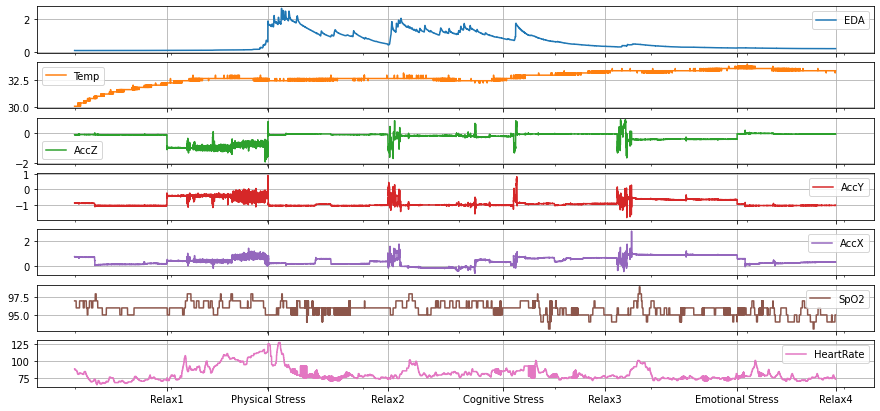

In [7]:
df1 = total_data.loc[total_data['SubjectID'] == 'Subject1']
# df1 = df1.set_index('Label', append=True).swaplevel(0,1)

relax1 = len(df1.index[df1.Label == 'Relax1'])
physicals = relax1+len(df1.index[df1.Label == 'PhysicalStress'])
relax2 = physicals+len(df1.index[df1.Label == 'Relax2'])
cogns = relax2+len(df1.index[df1.Label == 'CognitiveStress'])
relax3 = cogns+len(df1.index[df1.Label == 'Relax3'])
emotions = relax3+len(df1.index[df1.Label == 'EmotionalStress'])
relax4 = emotions+len(df1.index[df1.Label == 'Relax4'])
x = [relax1, physicals, relax2, cogns, relax3, emotions, relax4]

text_values = ['Relax1', 'Physical Stress', 'Relax2', 'Cognitive Stress', 'Relax3', 'Emotional Stress', 'Relax4']

df1.plot(subplots=True,figsize=(15,7),grid=True, xticks=x, y=['EDA','Temp','AccZ','AccY','AccX','SpO2', 'HeartRate'], use_index=True)
plt.xticks(x, text_values)
plt.show()


## Feature Engineering

In [8]:
total_data['Acc']=np.sqrt(total_data['AccX'].pow(2)+total_data['AccY'].pow(2)+total_data['AccZ'].pow(2))
main_data = total_data
total_data

,index,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label,HeartRate,SpO2,Acc
0,41074,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax1,89.0,97.0,1.159526
1,41075,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax1,89.0,97.0,1.167005
2,41076,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax1,89.0,97.0,1.152996
3,41077,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax1,89.0,97.0,1.166105
4,41078,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax1,89.0,97.0,1.152996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383107,383075,Subject9,2017-03-22,14,53,55.375,-0.18,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.175968
383108,383076,Subject9,2017-03-22,14,53,55.500,-0.17,-0.64,0.97,34.7,0.557,Relax4,73.0,94.0,1.174479
383109,383077,Subject9,2017-03-22,14,53,55.625,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.174479
383110,383078,Subject9,2017-03-22,14,53,55.750,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0,1.174479


In [9]:
total_data = total_data.set_index('SubjectID', append=True).swaplevel(0,1)
total_data

index    DateTime  Hour  Minute  Second  AccZ  AccY  AccX  \
SubjectID                                                                      
Subject1  0        41074  2017-03-22    13      48  16.000 -0.10 -0.87  0.76   
          1        41075  2017-03-22    13      48  16.125 -0.11 -0.87  0.77   
          2        41076  2017-03-22    13      48  16.250 -0.10 -0.87  0.75   
          3        41077  2017-03-22    13      48  16.375 -0.10 -0.87  0.77   
          4        41078  2017-03-22    13      48  16.500 -0.10 -0.87  0.75   
...                  ...         ...   ...     ...     ...   ...   ...   ...   
Subject9  383107  383075  2017-03-22    14      53  55.375 -0.18 -0.64  0.97   
          383108  383076  2017-03-22    14      53  55.500 -0.17 -0.64  0.97   
          383109  383077  2017-03-22    14      53  55.625 -0.17 -0.64  0.97   
          383110  383078  2017-03-22    14      53  55.750 -0.17 -0.64  0.97   
          383111  383079  2017-03-22    14      53  55.875 -0.18 -0.64  0.97   

                  Temp    EDA   Label  HeartRate  SpO2       Acc  
SubjectID                                                         
Subject1  0       30.1  0.083  Relax1       89.0  97.0  1.159526  
          1       30.1  0.081  Relax1       89.0  97.0  1.167005  
          2       30.1  0.081  Relax1       89.0  97.0  1.152996  
          3       30.1  0.079  Relax1       89.0  97.0  1.166105  
          4       30.1  0.081  Relax1       89.0  97.0  1.152996  
...                ...    ...     ...        ...   ...       ...  
Subject9  383107  34.7  0.561  Relax4       73.0  94.0  1.175968  
          383108  34.7  0.557  Relax4       73.0  94.0  1.174479  
          383109  34.7  0.561  Relax4       73.0  94.0  1.174479  
          383110  34.7  0.561  Relax4       73.0  94.0  1.174479  
          383111  34.7  0.561  Relax4       73.0  94.0  1.175968  

[383112 rows x 14 columns]

### Acc, Temp & SpO2 feature extraction functions

In [10]:
from numpy import mean, median, std, percentile, fft, abs, argmax

def Mean(data):
    #Returns the mean of a time series
    return data.mean()

def Median(data):
    #Returns the median of a time series
    return data.median()

def Std(data):
    #Returns the standard deviation 
    return data.std()

def Min(data):
    #Returns the minimum value of a time series
    return data.min()

def Max(data):
    #Returns the maximum value of a time series
    return data.max()



functions = [Mean, Median, Std, Min, Max]

### EDA Feature extraction functions

In [11]:
import numpy.polynomial as npp

def SCL_slope(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    coeffs = npp.polynomial.polyfit(signals.index.to_list(), signals['EDA_Tonic'], 1)
    SCL_slope = coeffs[0]
    
    return SCL_slope

def SCL_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCL_mean = signals['EDA_Tonic'].mean()
    
    return SCL_mean

def SCR_amplitude_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_amplitude_mean = signals['SCR_Amplitude'].sum()/signals['SCR_Peaks'].sum()
    
    return SCR_amplitude_mean

def SCR_peaks(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_peaks =  signals['SCR_Peaks'].sum()
    
    return SCR_peaks

def SCR_rise_time_mean(data):
    signals, info = nk.eda_process(data, sampling_rate=8)
    SCR_rise_time_mean = signals['SCR_RiseTime'].mean()
    
    return SCR_rise_time_mean

EDA_functions = [SCL_slope, SCL_mean, SCR_amplitude_mean, SCR_peaks, SCR_rise_time_mean]

### Heart Rate Feature extraction functions

#### Poincare plot of HR PPG signal for Subject 1

In [12]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
from matplotlib.patches import Ellipse


def hr_timedomain_meanRR(data):
    peaks, _ = find_peaks(data, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)

    hr = 60000/rr
    
    meanRR_ms = np.mean(rr)
    
    return meanRR_ms


def hr_timedomain_STD_RR_SDNN(data):
    peaks, _ = find_peaks(data, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)
    hr = 60000/rr
    
    STD_RR_SDNN = np.std(rr)
    
    return STD_RR_SDNN


def hr_timedomain_RMSSD(data):
    peaks, _ = find_peaks(data, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)
    hr = 60000/rr
    
    RMSSD = np.sqrt(np.mean(np.square(np.diff(rr))))
    
    return RMSSD


def frequency_domain_Power_VLF(data, fs=8):
    # Estimate the spectral density using Welch's method
    
    peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)

    x = np.cumsum(rr)/ 8.0
    f = interp1d(x, rr, kind='cubic',fill_value="extrapolate")

    # sample rate for interpolation
    fs = 8.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)

    rr_interpolated = f(xx)

    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    
    
    return vlf


def frequency_domain_Power_LF(data, fs=8):
    # Estimate the spectral density using Welch's method
    
    peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)

    x = np.cumsum(rr)/ 8.0
    f = interp1d(x, rr, kind='cubic',fill_value="extrapolate")

    # sample rate for interpolation
    fs = 8.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)

    rr_interpolated = f(xx)

    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    
    
    return lf


def frequency_domain_Power_HF(data, fs=8):
    # Estimate the spectral density using Welch's method
    
    peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)

    x = np.cumsum(rr)/ 8.0
    f = interp1d(x, rr, kind='cubic',fill_value="extrapolate")

    # sample rate for interpolation
    fs = 8.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)

    rr_interpolated = f(xx)

    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    hf = trapz(pxx[cond_hf], fxx[cond_hf])    
    
    return hf


def frequency_domain_Power_TP(data, fs=8):
    # Estimate the spectral density using Welch's method
    
    peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
    rr = np.diff(peaks)

    x = np.cumsum(rr)/ 8.0
    f = interp1d(x, rr, kind='cubic',fill_value="extrapolate")

    # sample rate for interpolation
    fs = 8.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)

    rr_interpolated = f(xx)

    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf
    
    return total_power





HR_functions = [hr_timedomain_meanRR, hr_timedomain_STD_RR_SDNN, hr_timedomain_RMSSD]

SD1: 82.298 ms
SD2: 95.566 ms


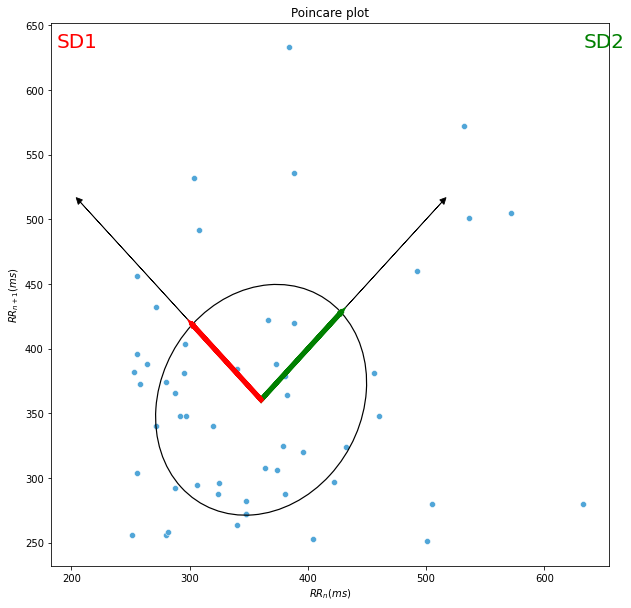

In [13]:
import seaborn as sns
from matplotlib.patches import Ellipse

def plot_poincare(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)
    
    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    return sd1, sd2


data_hr1 = main_data["HeartRate"].loc[main_data['SubjectID'] == 'Subject1']

peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
rr = np.diff(peaks)
sd1_2, sd2_2 = plot_poincare(rr)
print("SD1: %.3f ms" % sd1_2)
print("SD2: %.3f ms" % sd2_2)



In [14]:
data_hr1 = main_data["HeartRate"].loc[main_data['SubjectID'] == 'Subject1']

peaks, _ = find_peaks(data_hr1, distance=500*(30/60), prominence=0.01)
rr = np.diff(peaks)

x = np.cumsum(rr)/ 8.0
f = interp1d(x, rr, kind='cubic',fill_value="extrapolate")

# sample rate for interpolation
fs = 8.0
steps = 1 / fs

# now we can sample from interpolation function
xx = np.arange(1, np.max(x), steps)

rr_interpolated = f(xx)

def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    
    results = {}
    results['Power VLF (ms2)'] = vlf
    results['Power LF (ms2)'] = lf
    results['Power HF (ms2)'] = hf   
    results['Power Total (ms2)'] = total_power

    results['LF/HF'] = (lf/hf)
    results['Peak VLF (Hz)'] = peak_vlf
    results['Peak LF (Hz)'] = peak_lf
    results['Peak HF (Hz)'] = peak_hf

    results['Fraction LF (nu)'] = lf_nu
    results['Fraction HF (nu)'] = hf_nu
    return results, fxx, pxx

print("Frequency domain metrics:")
results_2, fxx_2, pxx_2 = frequency_domain(rr_interpolated)

# for k, v in results_2.items():
#     print("- %s: %.2f" % (k, v))
results_2

Frequency domain metrics:


{'Power VLF (ms2)': 229.6492076996271,
 'Power LF (ms2)': 0.4505237189176967,
 'Power HF (ms2)': 0.0006771308145174528,
 'Power Total (ms2)': 230.10040854935934,
 'LF/HF': 665.3422193446561,
 'Peak VLF (Hz)': 0.015625,
 'Peak LF (Hz)': 0.046875,
 'Peak HF (Hz)': 0.15625,
 'Fraction LF (nu)': 99.84992696380795,
 'Fraction HF (nu)': 0.15007303619204773}

In [15]:
grouped_data = total_data.groupby(['SubjectID', 'Label'])
grouped_data[['Acc', 'Temp', 'SpO2','EDA','HeartRate']].mean()

Acc       Temp       SpO2       EDA  HeartRate
SubjectID Label                                                               
Subject1  CognitiveStress  1.054711  32.512163  96.197268  1.199491  83.573809
          EmotionalStress  1.180263  33.261690  95.644496  0.413021  78.358118
          PhysicalStress   1.156814  32.514971  96.420190  0.134480  95.955048
          Relax1           1.084812  31.364473  96.026656  0.086164  73.569346
          Relax2           1.081296  32.517719  95.876963  1.253509  83.533162
...                             ...        ...        ...       ...        ...
Subject9  PhysicalStress   1.171135  31.450974  95.113871  0.979116  99.014903
          Relax1           1.190926  29.066722  94.606414  0.639008  82.243648
          Relax2           1.155932  31.454394  95.196585  2.729339  80.380258
          Relax3           1.173170  34.043274  94.606414  2.459739  75.128280
          Relax4           1.177480  34.274000  95.053333  0.798933  74.160000

[140 rows x 5 columns]

In [74]:
features = grouped_data.agg({
        'Acc': functions,
        'Temp': functions,
        'SpO2': functions,
        'EDA': EDA_functions,
        'HeartRate': HR_functions
    })

features

Acc                                          \
                               Mean    Median       Std       Min       Max   
SubjectID Label                                                               
Subject1  CognitiveStress  1.054711  1.032521  0.053131  0.730205  1.595274   
          EmotionalStress  1.180263  1.183765  0.089331  0.556058  3.036281   
          PhysicalStress   1.156814  1.141446  0.123338  0.521632  2.119929   
          Relax1           1.084812  1.067801  0.036434  1.016858  1.175542   
          Relax2           1.081296  1.072474  0.024645  0.861162  1.304071   
...                             ...       ...       ...       ...       ...   
Subject9  PhysicalStress   1.171135  1.140789  0.141528  0.578360  1.838804   
          Relax1           1.190926  1.193231  0.032385  0.814494  1.735627   
          Relax2           1.155932  1.172774  0.059328  0.714493  3.080406   
          Relax3           1.173170  1.172263  0.016629  0.758222  1.456297   
          Relax4           1.177480  1.178516  0.009729  0.934666  1.295685   

                                Temp                               ...  SpO2  \
                                Mean Median       Std   Min   Max  ...   Min   
SubjectID Label                                                    ...         
Subject1  CognitiveStress  32.512163   32.6  0.107279  32.2  33.1  ...  95.0   
          EmotionalStress  33.261690   33.3  0.230917  32.6  33.7  ...  94.0   
          PhysicalStress   32.514971   32.6  0.138124  32.2  32.9  ...  95.0   
          Relax1           31.364473   31.6  0.565531  30.1  32.2  ...  95.0   
          Relax2           32.517719   32.6  0.102266  32.4  32.9  ...  94.0   
...                              ...    ...       ...   ...   ...  ...   ...   
Subject9  PhysicalStress   31.450974   31.6  0.247588  30.8  31.8  ...  90.0   
          Relax1           29.066722   29.3  1.177078  26.4  30.8  ...  93.0   
          Relax2           31.454394   31.4  0.219902  31.2  31.8  ...  94.0   
          Relax3           34.043274   34.1  0.305937  33.5  34.9  ...  93.0   
          Relax4           34.274000   34.3  0.341623  33.7  34.9  ...  94.0   

                                      EDA                               \
                            Max SCL_slope  SCL_mean SCR_amplitude_mean   
SubjectID Label                                                          
Subject1  CognitiveStress  98.0  1.542539  1.198265           0.106480   
          EmotionalStress  99.0  0.743643  0.413544           0.322688   
          PhysicalStress   98.0  0.043083  0.134148           0.021763   
          Relax1           98.0  0.083630  0.086176           0.002043   
          Relax2           98.0  2.017218  1.254258           0.269222   
...                         ...       ...       ...                ...   
Subject9  PhysicalStress   98.0  0.115196  0.979297           0.054243   
          Relax1           98.0  1.110612  0.639083           0.003731   
          Relax2           97.0  3.680251  2.729604           0.125620   
          Relax3           97.0  3.224622  2.460912           0.167001   
          Relax4           98.0  1.102888  0.798940           0.003163   

                                                                  HeartRate  \
                          SCR_peaks SCR_rise_time_mean hr_timedomain_meanRR   
SubjectID Label                                                               
Subject1  CognitiveStress      27.0           0.011371           358.857143   
          EmotionalStress       4.0           0.001525           308.909091   
          PhysicalStress        6.0           0.001048           389.333333   
          Relax1              241.0           0.023948           346.666667   
          Relax2               14.0           0.005727           345.000000   
...                             ...                ...                  ...   
Subject9  PhysicalStress       43.0           0.013947  

In [75]:
# features.reset_index(inplace=True)
# features.columns = ['{0}{1}'.format(a, b) if b else a for a, b in features.columns]
# features
#features.to_csv('features.csv')

In [76]:
features.reset_index(inplace=True)
features.columns = ['{0}{1}'.format(a, b) if b else a for a, b in features.columns]
features

,SubjectID,Label,AccMean,AccMedian,AccStd,AccMin,AccMax,TempMean,TempMedian,TempStd,...,SpO2Min,SpO2Max,EDASCL_slope,EDASCL_mean,EDASCR_amplitude_mean,EDASCR_peaks,EDASCR_rise_time_mean,HeartRatehr_timedomain_meanRR,HeartRatehr_timedomain_STD_RR_SDNN,HeartRatehr_timedomain_RMSSD
0,Subject1,CognitiveStress,1.054711,1.032521,0.053131,0.730205,1.595274,32.512163,32.6,0.107279,...,95.0,98.0,1.542539,1.198265,0.106480,27.0,0.011371,358.857143,81.105625,108.249711
1,Subject1,EmotionalStress,1.180263,1.183765,0.089331,0.556058,3.036281,33.261690,33.3,0.230917,...,94.0,99.0,0.743643,0.413544,0.322688,4.0,0.001525,308.909091,50.077131,73.613178
2,Subject1,PhysicalStress,1.156814,1.141446,0.123338,0.521632,2.119929,32.514971,32.6,0.138124,...,95.0,98.0,0.043083,0.134148,0.021763,6.0,0.001048,389.333333,122.977866,133.314665
3,Subject1,Relax1,1.084812,1.067801,0.036434,1.016858,1.175542,31.364473,31.6,0.565531,...,95.0,98.0,0.083630,0.086176,0.002043,241.0,0.023948,346.666667,48.643830,74.447297
4,Subject1,Relax2,1.081296,1.072474,0.024645,0.861162,1.304071,32.517719,32.6,0.102266,...,94.0,98.0,2.017218,1.254258,0.269222,14.0,0.005727,345.000000,43.023250,68.679379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Subject9,PhysicalStress,1.171135,1.140789,0.141528,0.578360,1.838804,31.450974,31.6,0.247588,...,90.0,98.0,0.115196,0.979297,0.054243,43.0,0.013947,599.000000,313.041531,371.792057
136,Subject9,Relax1,1.190926,1.193231,0.032385,0.814494,1.735627,29.066722,29.3,1.177078,...,93.0,98.0,1.110612,0.639083,0.003731,210.0,0.036615,331.428571,44.564102,80.399005
137,Subject9,Relax2,1.155932,1.172774,0.059328,0.714493,3.080406,31.454394,31.4,0.219902,...,94.0,97.0,3.680251,2.729604,0.125620,9.0,0.002968,368.000000,97.897906,118.618717
138,Subject9,Relax3,1.173170,1.172263,0.016629,0.758222,1.456297,34.043274,34.1,0.305937,...,93.0,97.0,3.224622,2.460912,0.167001,7.0,0.002811,383.333333,82.733844,94.250729


In [77]:
# features.Label = features.Label.str.replace('Relax1', 'Relax')
# features.Label = features.Label.str.replace('Relax2', 'Relax')
# features.Label = features.Label.str.replace('Relax3', 'Relax')
# features.Label = features.Label.str.replace('Relax4', 'Relax')
f_names = features[ features['Label'] == 'Relax2' ].index
features.drop(f_names, inplace = True)
f_names = features[ features['Label'] == 'Relax3' ].index
features.drop(f_names, inplace = True)
f_names = features[ features['Label'] == 'Relax4' ].index
features.drop(f_names, inplace = True)

features

,SubjectID,Label,AccMean,AccMedian,AccStd,AccMin,AccMax,TempMean,TempMedian,TempStd,...,SpO2Min,SpO2Max,EDASCL_slope,EDASCL_mean,EDASCR_amplitude_mean,EDASCR_peaks,EDASCR_rise_time_mean,HeartRatehr_timedomain_meanRR,HeartRatehr_timedomain_STD_RR_SDNN,HeartRatehr_timedomain_RMSSD
0,Subject1,CognitiveStress,1.054711,1.032521,0.053131,0.730205,1.595274,32.512163,32.6,0.107279,...,95.0,98.0,1.542539,1.198265,0.106480,27.0,0.011371,358.857143,81.105625,108.249711
1,Subject1,EmotionalStress,1.180263,1.183765,0.089331,0.556058,3.036281,33.261690,33.3,0.230917,...,94.0,99.0,0.743643,0.413544,0.322688,4.0,0.001525,308.909091,50.077131,73.613178
2,Subject1,PhysicalStress,1.156814,1.141446,0.123338,0.521632,2.119929,32.514971,32.6,0.138124,...,95.0,98.0,0.043083,0.134148,0.021763,6.0,0.001048,389.333333,122.977866,133.314665
3,Subject1,Relax1,1.084812,1.067801,0.036434,1.016858,1.175542,31.364473,31.6,0.565531,...,95.0,98.0,0.083630,0.086176,0.002043,241.0,0.023948,346.666667,48.643830,74.447297
7,Subject10,CognitiveStress,1.072514,1.078749,0.056446,0.633246,1.475771,32.602773,32.6,0.365991,...,95.0,98.0,7.978834,8.490019,0.095690,393.0,0.034530,362.285714,79.623604,96.595376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Subject8,Relax1,1.199208,1.200375,0.006753,1.107294,1.280508,29.590837,29.7,1.128771,...,94.0,96.0,0.076795,0.063852,0.001615,291.0,0.027697,314.285714,31.774717,51.251016
133,Subject9,CognitiveStress,1.049009,1.009158,0.095763,0.541387,1.526073,32.738226,32.6,0.468436,...,89.0,98.0,1.572321,1.410958,0.019346,52.0,0.008492,364.666667,131.279177,162.490615
134,Subject9,EmotionalStress,1.050389,1.026304,0.074425,0.579483,2.016978,33.958466,34.1,0.737046,...,93.0,99.0,2.357554,1.708398,0.662997,3.0,0.000391,356.250000,77.113147,126.538532
135,Subject9,PhysicalStress,1.171135,1.140789,0.141528,0.578360,1.838804,31.450974,31.6,0.247588,...,90.0,98.0,0.115196,0.979297,0.054243,43.0,0.013947,599.000000,313.041531,371.792057


In [78]:
X = features.drop('Label', axis = 1)
X = X.drop('SubjectID', axis = 1)
y = features['Label']

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

normalized_data = NormalizeData(X)

normalized_data.head()

,AccMean,AccMedian,AccStd,AccMin,AccMax,TempMean,TempMedian,TempStd,TempMin,TempMax,...,SpO2Min,SpO2Max,EDASCL_slope,EDASCL_mean,EDASCR_amplitude_mean,EDASCR_peaks,EDASCR_rise_time_mean,HeartRatehr_timedomain_meanRR,HeartRatehr_timedomain_STD_RR_SDNN,HeartRatehr_timedomain_RMSSD
0,0.597932,0.532682,0.243006,0.538005,0.182392,0.668038,0.6500,0.018557,0.811111,0.619718,...,0.9375,0.6,0.269809,0.139100,0.028562,0.063939,0.267618,0.200412,0.197052,0.165505
1,0.947283,0.953757,0.423280,0.357240,0.553424,0.761455,0.7375,0.097953,0.855556,0.704225,...,0.8750,0.8,0.183751,0.046452,0.087452,0.005115,0.029993,0.034104,0.089634,0.095678
2,0.882037,0.835938,0.592639,0.321506,0.317481,0.668388,0.6500,0.038365,0.811111,0.591549,...,0.9375,0.6,0.108285,0.013466,0.005488,0.010230,0.018477,0.301887,0.342011,0.216036
3,0.681687,0.630905,0.159857,0.835550,0.074319,0.524996,0.5250,0.312827,0.577778,0.492958,...,0.9375,0.6,0.112653,0.007802,0.000116,0.611253,0.571144,0.159822,0.084672,0.097360
7,0.647468,0.661385,0.259515,0.437361,0.151622,0.679331,0.6500,0.184691,0.788889,0.647887,...,0.9375,0.6,0.963142,1.000000,0.025623,1.000000,0.826504,0.211828,0.191922,0.142010


In [46]:
y

0      CognitiveStress
1      EmotionalStress
2       PhysicalStress
3               Relax1
7      CognitiveStress
            ...       
129             Relax1
133    CognitiveStress
134    EmotionalStress
135     PhysicalStress
136             Relax1
Name: Label, Length: 80, dtype: object

###  Feature Selection using BorutaPy

In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
train_pct_index = int(0.9 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [80]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	8
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	8
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	8
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	8
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	6
Itera

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=116,
                                          random_state=RandomState(MT19937) at 0x7FDC8C278140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FDC8C278140, verbose=2)

In [81]:
type(boruta_selector)

boruta.boruta_py.BorutaPy

In [82]:
print("Selected Features: ", boruta_selector.support_)    # check selected features

Selected Features:  [False False  True  True  True  True  True  True  True False  True False
 False False False  True False  True  True  True False False False]


In [83]:
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [2 2 1 1 1 1 1 1 1 3 1 5 2 6 9 1 2 1 1 1 4 8 7]
No. of significant features:  12


In [84]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
8,TempMin,1
15,EDASCL_slope,1
18,EDASCR_peaks,1
19,EDASCR_rise_time_mean,1
10,SpO2Mean,1
7,TempStd,1
17,EDASCR_amplitude_mean,1
5,TempMean,1
4,AccMax,1
3,AccMin,1


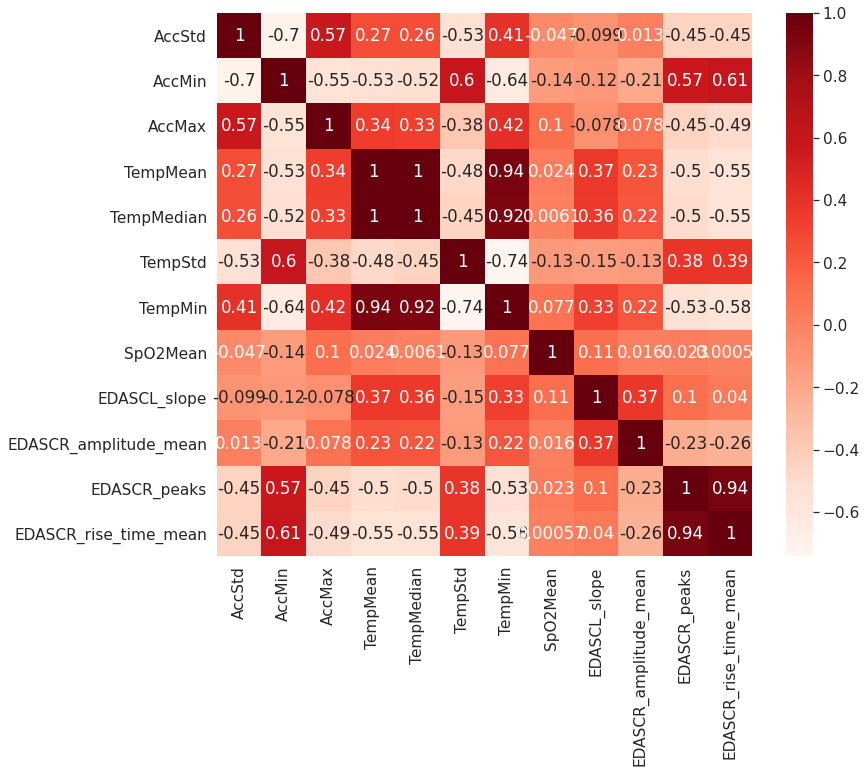

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sx = selected_rf_features['Feature'].loc[selected_rf_features['Ranking'] == 1]

X = X[sx.tolist()]

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

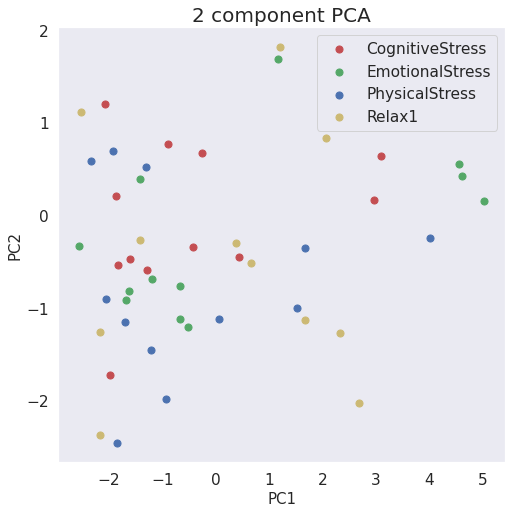

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

# Το PCA απαιτεί κανονικοποιημένες τιμες μεταξύ των features
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X = NormalizeData(X)

standardized_X = StandardScaler().fit_transform(X)

# 3D plot
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(standardized_X)

principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

finalDF = pd.concat((principalDF, features['Label']), axis = 1)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    principalComponents, x=0, y=1, z=2, color=features['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# 2D plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = set(features['Label'])
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Label'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [87]:
#T-SNE
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X)
# plot t-SNE clusters
cluster.tsneplot(score=tsne_em)

color_class = features['Label'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7'), legendpos='upper right', legendanchor=(1.15, 1) )

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 0.425485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.605328
[t-SNE] KL divergence after 1000 iterations: 0.157528


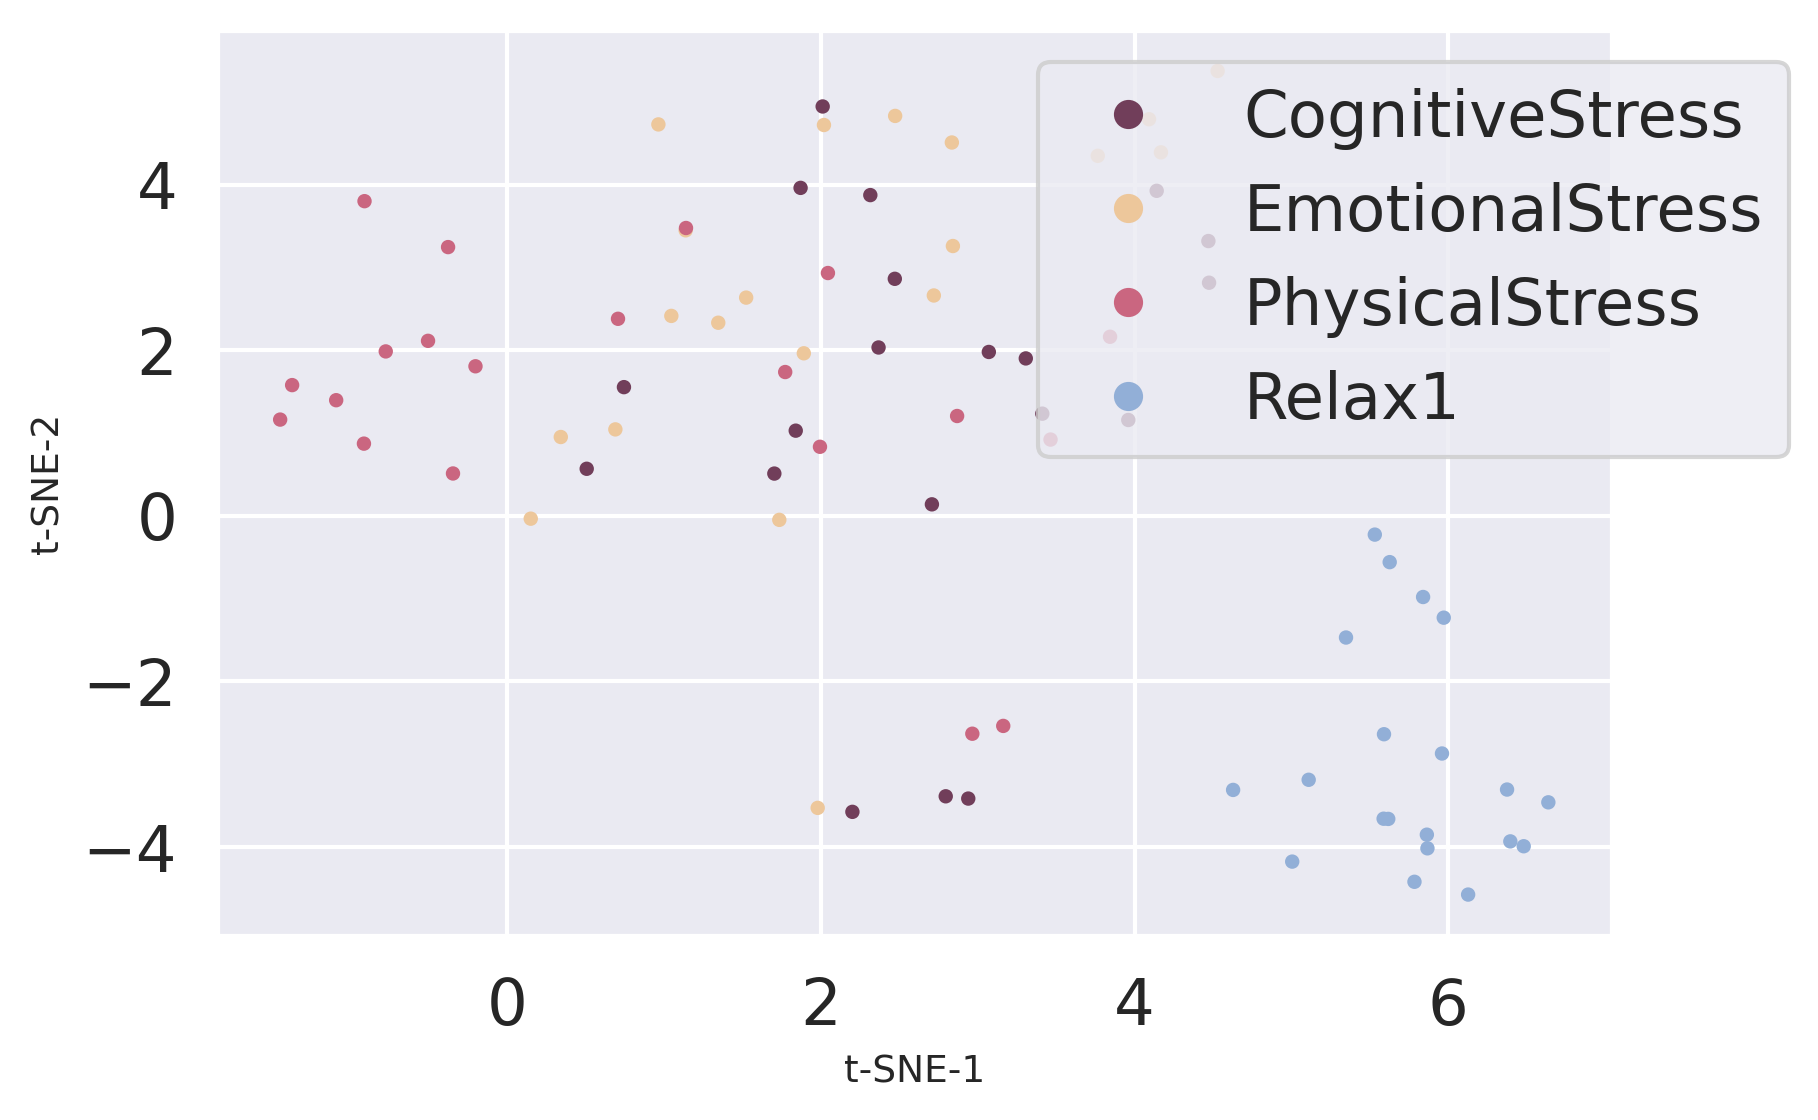

In [88]:
from IPython.display import Image
Image("tsne_2d.png")

# Classification

In [89]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [90]:
X_important_train.shape

(72, 12)

In [91]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_boruta.fit(X_important_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [92]:
accuracy_score(y_test, rf_boruta.predict(X_important_test))

1.0

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

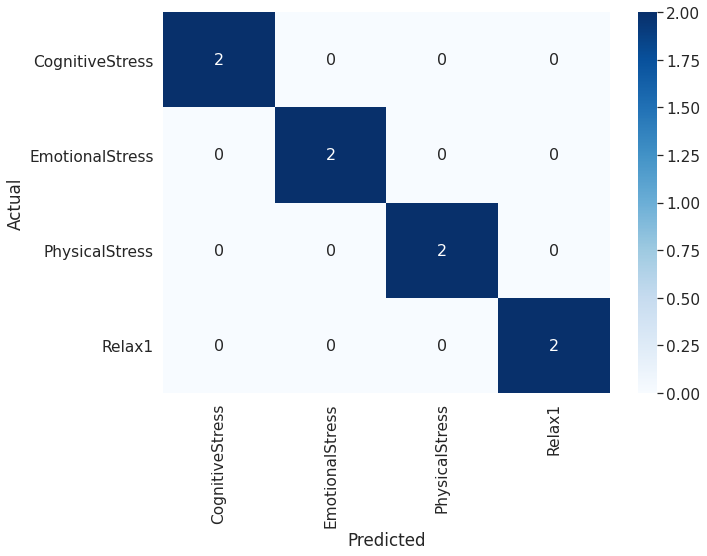

In [93]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, rf_boruta.predict(X_important_test))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [94]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [95]:
rf_hyper = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf_hyper, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [96]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [97]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 500}

In [98]:
accuracy_score(y_test, grid_search.predict(X_important_test))

1.0

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

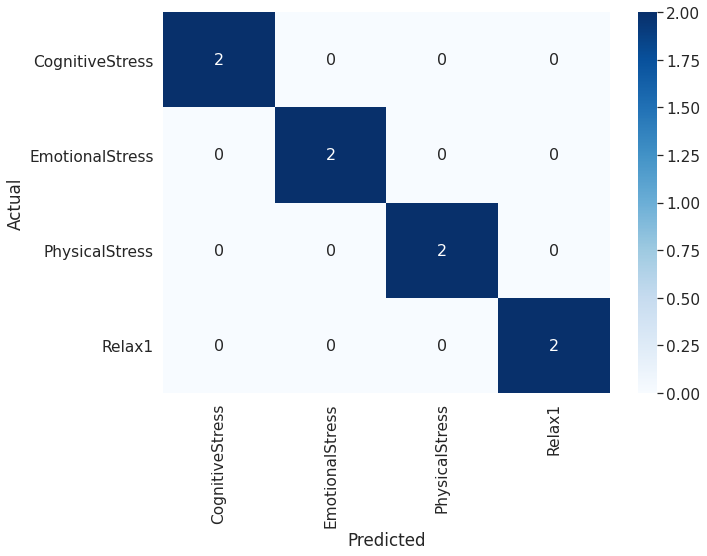

In [99]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, grid_search.predict(X_important_test))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
